# About the application

In [114]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, LinearRegression, Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report

import time

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

from sklearn.model_selection import GridSearchCV

# Adding libraries used by loan amount part of the application

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor


import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier


# Read the data

In [115]:
df = pd.read_csv("data/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding the Data

In [116]:
# Rows and Columns Count
print(df.shape)

#Column Names and Data Types
df.info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [117]:
# Check the null values in the data

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [118]:
df['Loan_ID'].value_counts() # Loan ID is a unique data field and should be dropped from the dataset because its not a feature column

# We may need this column to merge data after one hot encoding so not dropping yet

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [119]:
# Calculate categorical columns
count = 0
for column in df.columns:
    if df[column].dtype == 'object':
      count += 1
print('Categorical Columns:' , count)

Categorical Columns: 8


# Data preparation (Explore, Clean)

In [120]:
# Handling missing data

# Tried following. Gave the FutureWarning for Pandas 3.0 


#df['Self_Employed'].fillna("Unknown", inplace=True)
#df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
#df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

df.fillna({
    'Self_Employed': "Unknown",
    'Dependents': df['Dependents'].mode()[0],
    'LoanAmount': df['LoanAmount'].median(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].median(),
    'Credit_History': df['Credit_History'].mode()[0]
}, inplace=True)


In [121]:
# Check missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [122]:
# Drop remaining rows with missing values
df.dropna(inplace=True)

# Verify no missing values remain
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [123]:
# Convert 'Loan_Status' from categorical ('Y', 'N') to numerical (1, 0)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0}).astype('int32')

# Target column is Loan_Status
print (df['Loan_Status'].value_counts(dropna=False))

Loan_Status
1    411
0    187
Name: count, dtype: int64


# Visualize Data

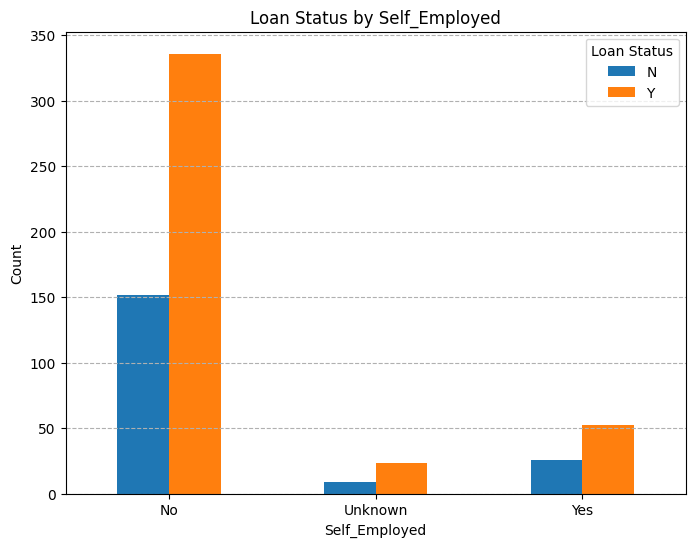

In [124]:
# Plot the count of Self_Employed grouped by Loan Status 

# Use groupby
df.groupby(['Self_Employed', 'Loan_Status']).size().unstack().plot(kind='bar', figsize=(8, 6))

# Add labels and title
plt.title('Loan Status by Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['N', 'Y'])

# Make label horizontal 
plt.xticks(rotation=0)

# Add grid 
plt.grid(axis='y', linestyle='--')
plt.show()


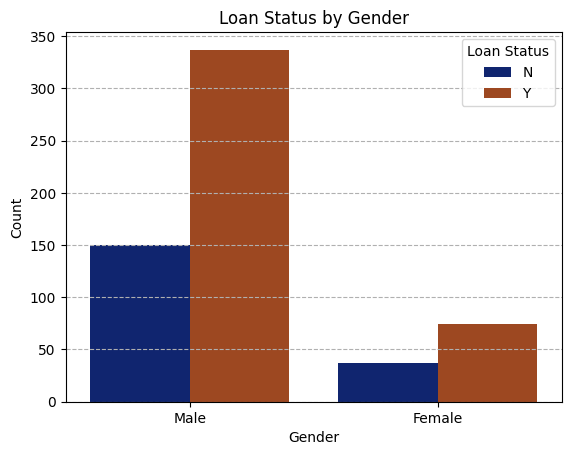

In [125]:
# Plot the count of Gender grouped by Loan Status using Sea Born

# Use CountPlot
myplot = sns.countplot(data=df, x="Gender", hue="Loan_Status", palette="dark")

# Add labels and title
plt.title("Loan Status by Gender", fontsize=12)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(title="Loan Status", labels=['N', 'Y'])

# Add grid 
myplot.yaxis.grid(True, linestyle="--")

# Show the plot
plt.show()


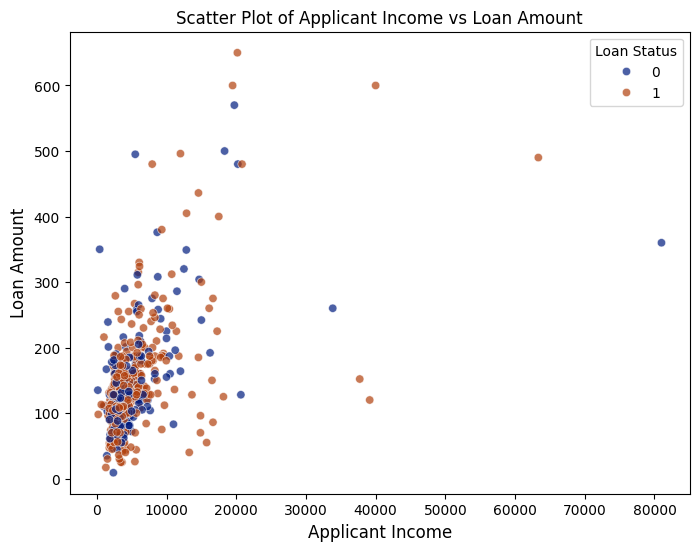

In [126]:
# Analyze the loan amount data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status", palette="dark", alpha=0.7)

# Add labels and title
plt.title("Scatter Plot of Applicant Income vs Loan Amount", fontsize=12)
plt.xlabel("Applicant Income", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.legend(title="Loan Status")

# Display the plot
plt.show()

In [127]:
#  It means that higher-income applicants requesting higher loan amount but not approved. This indicates other features also play important part in the approval process.

In [128]:
total_loans_approved = df[df['Loan_Status'] == 1].shape[0]
print(f"Total Loans Approved: {total_loans_approved}")

# Count of male applicants
total_male_applicants = df[df['Gender'] == 'Male'].shape[0]
print(f"Total Male Applicants: {total_male_applicants}")

# Count of married applicants
total_married_applicants = df[df['Married'] == 'Yes'].shape[0]
print(f"Total Married Applicants: {total_married_applicants}")

# Count of graduate applicants
total_graduate_applicants = df[df['Education'] == 'Graduate'].shape[0]
print(f"Total Graduate Applicants: {total_graduate_applicants}")

# Count of self-employed applicants
total_self_employed = df[df['Self_Employed'] == 'Yes'].shape[0]
print(f"Total Self-Employed Applicants: {total_self_employed}")


Total Loans Approved: 411
Total Male Applicants: 487
Total Married Applicants: 388
Total Graduate Applicants: 465
Total Self-Employed Applicants: 78


In [129]:
categorical_columns = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area"
]

# Data preparation (Transform)

In [130]:


# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype='int32')




df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 613
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  598 non-null    object 
 1   ApplicantIncome          598 non-null    int64  
 2   CoapplicantIncome        598 non-null    float64
 3   LoanAmount               598 non-null    float64
 4   Loan_Amount_Term         598 non-null    float64
 5   Credit_History           598 non-null    float64
 6   Loan_Status              598 non-null    int32  
 7   Gender_Female            598 non-null    int32  
 8   Gender_Male              598 non-null    int32  
 9   Married_No               598 non-null    int32  
 10  Married_Yes              598 non-null    int32  
 11  Dependents_0             598 non-null    int32  
 12  Dependents_1             598 non-null    int32  
 13  Dependents_2             598 non-null    int32  
 14  Dependents_3+            598 no

In [131]:
df_encoded.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1


In [132]:
df_encoded.drop(columns = ["Loan_ID"], inplace = True)

# Establish Baseline

In [133]:
class_distribution = df_encoded['Loan_Status'].value_counts(normalize=True)
print (class_distribution)

Loan_Status
1    0.687291
0    0.312709
Name: proportion, dtype: float64


In [134]:
# We should aim to achieve a performance better than 68.7% accuracy.

# Feature Selection

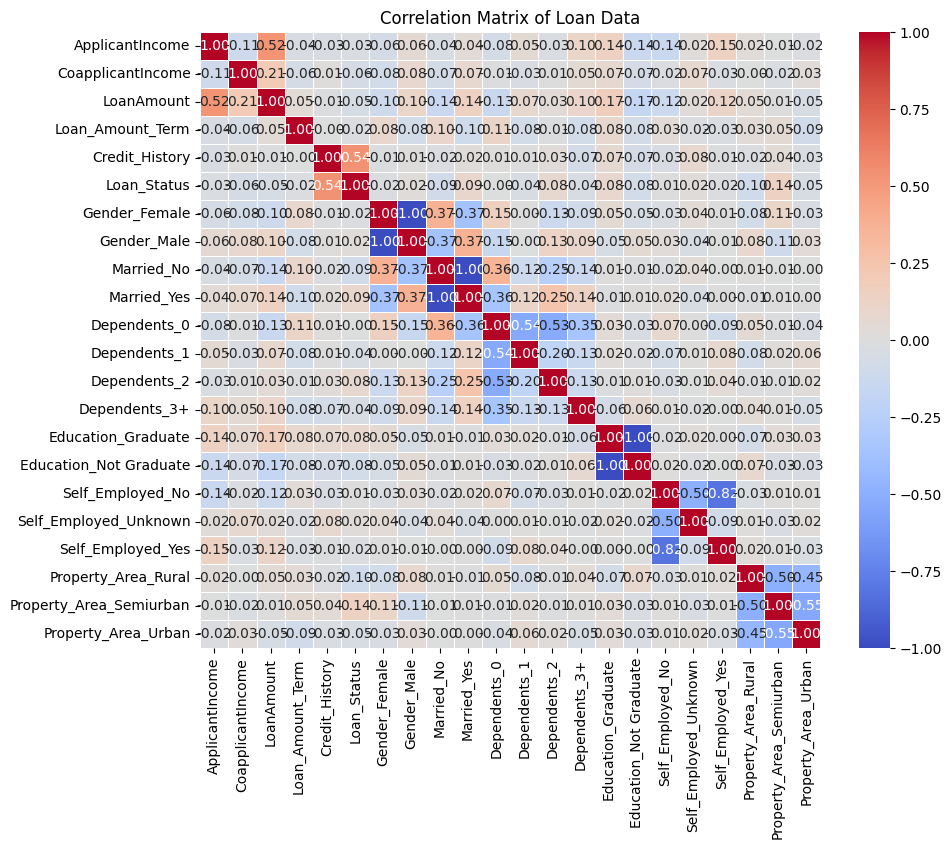

In [135]:
# Compute the correlation matrix

correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Loan Data")
plt.show()





# Engineering Features

In [136]:
# Extract the correlation factor between Credit History and Loan_Status
credit_history_correlation = correlation_matrix.loc["Credit_History", "Loan_Status"]
print('Credit Histrory correlation:',credit_history_correlation)

# Extract the correlation factor between Applicant Income and Loan_Status
applicant_income_correlation = correlation_matrix.loc["ApplicantIncome", "Loan_Status"]
print('Applicant Income correlation:',applicant_income_correlation)

Credit Histrory correlation: 0.5356381836572336
Applicant Income correlation: -0.02524841707927237


In [137]:
# This suggestes strong correlation with credit history. Also applicant income has little to no direct correlation with loan approval.

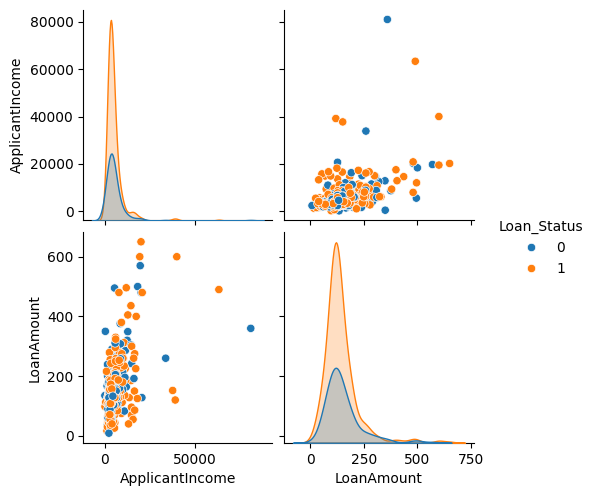

In [138]:
sns.pairplot(df[['ApplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status')
plt.show()

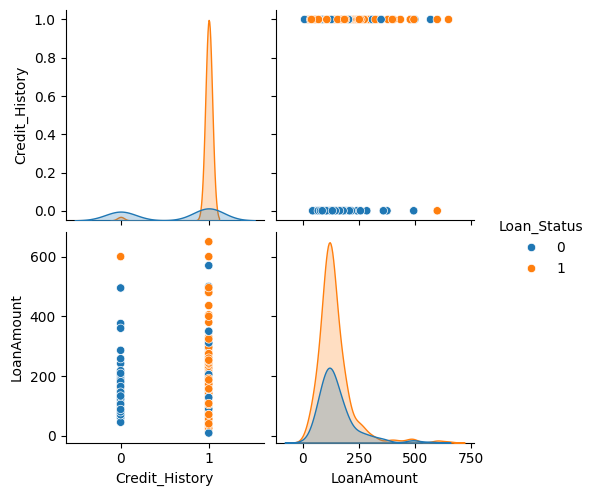

In [139]:
sns.pairplot(df[['Credit_History', 'LoanAmount', 'Loan_Status']], hue='Loan_Status')
plt.show()

# Train/Test Split

In [195]:
X = df_encoded.drop(columns=['Loan_Status'])
y = df_encoded['Loan_Status']

# Logistic Regression and Score
Use Logistic Regression to build a basic model on your data. 

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# startify = y - samples proportionately within each group
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [198]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print (accuracy)

0.8


In [199]:
# This is better than our baseline
print (logistic_model.coef_)

[[ 5.14369471e-06 -3.25498994e-05 -2.20753097e-03 -2.47945765e-03
   3.38051592e+00 -1.65937393e-01 -1.45870482e-01 -3.56224612e-01
   4.44167367e-02  3.68790941e-02 -4.99215968e-01  2.05894122e-01
  -5.53651239e-02  8.14291092e-03 -3.19950787e-01 -1.11373923e-01
  -1.62349728e-01 -3.80842250e-02 -3.82175833e-01  3.07506009e-01
  -2.37138052e-01]]


In [208]:
# The most important feature # suggusted
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_model.coef_[0]
})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

# Select top feature
top_features = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False).head(1)
selected_features = top_features['Feature'].values
print('The most importnt feature is', selected_features[0])

The most importnt feature is Credit_History


# Model Comparision KNN, SVM, Decision Tree

In [144]:
# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=7500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=3),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest Classifier': RandomForestClassifier(n_estimators=5, random_state=42) # Suggested option
}
# As suggested max_depth to prevent overfitting in the decision tree
# Added RandomForest Classifier model and added parameters to prevent over fitting
# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Start the timer
    start_time = time.time()
    model.fit(X_train, y_train)
    # Stop the timer
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, pred_train)
    test_accuracy = accuracy_score(y_test, pred_test)

    results[model_name] = {"Train Time": elapsed_time,
        "Train Accuracy": train_accuracy,"Test Accuracy": test_accuracy, 
        "Classification Report": classification_report(y_test, pred_test, output_dict=True)
    }

# Display the results
results_summary = {model: {"Train Time": metrics["Train Time"], "Train Accuracy": metrics["Train Accuracy"], "Test Accuracy": metrics["Test Accuracy"], "Precision": metrics["Classification Report"]['1']['precision'],  "F1 Score": metrics["Classification Report"]['1']['f1-score'],  "Recall": metrics["Classification Report"]['1']['recall']} for model, metrics in results.items()}
results_df = pd.DataFrame(results_summary).T

print("Model Comparison for various models:")
print(results_df)

Model Comparison for various models:
                         Train Time  Train Accuracy  Test Accuracy  Precision  \
Logistic Regression        0.351728        0.811005       0.800000   0.789474   
Decision Tree              0.000000        0.818182       0.800000   0.793333   
KNN                        0.000000        0.739234       0.672222   0.715232   
SVM                        0.000000        0.691388       0.688889   0.688889   
RandomForest Classifier    0.000000        0.966507       0.744444   0.800000   

                         F1 Score    Recall  
Logistic Regression      0.869565  0.967742  
Decision Tree            0.868613  0.959677  
KNN                      0.785455  0.870968  
SVM                      0.815789  1.000000  
RandomForest Classifier  0.818898  0.838710  


# Model Hyper Parameter Optimization

In [145]:
# Define hyper parameters for the model
param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

param_grid_dectree = {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }


param_grid_logistic = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    }

param_grid_rforest = {
        'n_estimators': [3,8, 10, 25, 100]
        
    }

# Define list of parameters
param_grids = {
    'Logistic Regression': param_grid_logistic,
    'Decision Tree': param_grid_dectree,
    'KNN': param_grid_knn,
    'RForest': param_grid_rforest

    
}



print('Parameters ready')

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=7500, random_state=42),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
     'RForest': RandomForestClassifier()
}

print('Models ready, removed SVM')


Parameters ready
Models ready, removed SVM


In [146]:
# Perform hyperparameter tuning and training
for model_name in models:
    print(f"Training {model_name} with hyperparameter tuning...")
    
    # Define the GridSearchCV object
    model_grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=4, n_jobs=-1, verbose=1)
    
    # Train the selected model
    model_grid_search.fit(X_train, y_train)
    
    # Best model after hyper parameter tuning
    best_model = model_grid_search.best_estimator_
    print(f"Best Hyperparameters for {model_name}: {model_grid_search.best_params_}")
    
    # Evaluate the model - prediction 
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {accuracy}")

    # Identify the best model
    best_model = model_grid_search.best_estimator_

    # Locate the index of the best model's result
    best_index = model_grid_search.best_index_

    # Find the training time of the best model from cv_results_
    best_train_time = model_grid_search.cv_results_['mean_fit_time'][best_index]

    print(f"Training time for the best model: {best_train_time} seconds\n")

Training Logistic Regression with hyperparameter tuning...
Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Hyperparameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Test Accuracy for Logistic Regression: 0.8
Training time for the best model: 0.6523239612579346 seconds

Training Decision Tree with hyperparameter tuning...
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Best Hyperparameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy for Decision Tree: 0.8055555555555556
Training time for the best model: 0.0 seconds

Training KNN with hyperparameter tuning...
Fitting 4 folds for each of 16 candidates, totalling 64 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Test Accuracy for KNN: 0.6444444444444445
Training time for the best model: 0.0 seconds

Training RForest with hyperparameter tuning...
Fitting 4 folds for each of 5 candidates, totall

# Test new scenarios for loan application aprroval process

In [147]:
# Example new loan application data (replace these values accordingly)
new_application = {
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 2000,
    "LoanAmount": 150,
    "Loan_Amount_Term": 360,
    "Credit_History": 1.0,
     "Gender_Female": 0,
    "Gender_Male": 1,
     "Married_No": 0,
    "Married_Yes": 1,
    "Dependents_0": 1, "Dependents_1": 0, "Dependents_2": 0, "Dependents_3+": 0,
    "Education_Graduate": 1, "Education_Not Graduate": 0,
     "Self_Employed_No": 1,"Self_Employed_Unknown": 1,"Self_Employed_Yes": 0,
     "Property_Area_Rural": 0,  "Property_Area_Semiurban": 1, "Property_Area_Urban": 0
}

In [148]:
# Convert to DataFrame
new_application_df = pd.DataFrame([new_application])



In [149]:
prediction = logistic_model.predict(new_application_df)

# Output result
loan_status = "Approved" if prediction[0] == 1 else "Rejected"
print(f"Loan Prediction: {loan_status}")

Loan Prediction: Approved


# Next goal - Predict the amount of loan that can be approved for the applicant

In this case our target variable will be Loan_Amount and we will use only approved loan data


In [150]:
# Filter data for only approved loans
df_amount = df_encoded[df_encoded["Loan_Status"] == 1]

df_amount.drop(columns=["Loan_Status"], inplace=True)

<Axes: xlabel='Education', ylabel='LoanAmount'>

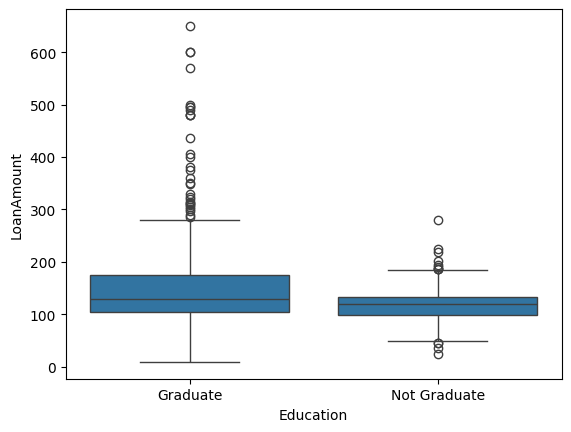

In [151]:
# Plotting for Loan Amount by Education
sns.boxplot(x=df['Education'], y=df['LoanAmount'])

# Graduate population gets bigger loans


<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

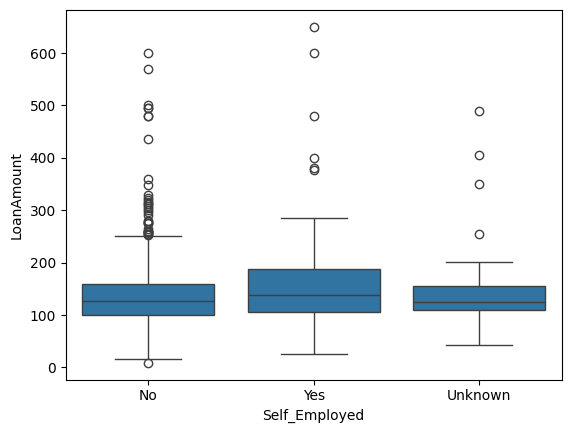

In [152]:
# Plot for Loan Amount by Self Employment Status
sns.boxplot(x=df['Self_Employed'], y=df['LoanAmount'])

# If approved, self employed get larger loans


<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

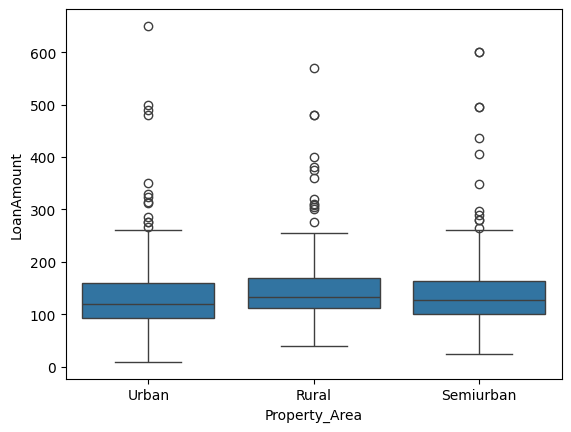

In [153]:
# Plot for Loan Amount by Property Area
sns.boxplot(x=df['Property_Area'], y=df['LoanAmount'])

# Propert area has very less influence on the loan amount

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

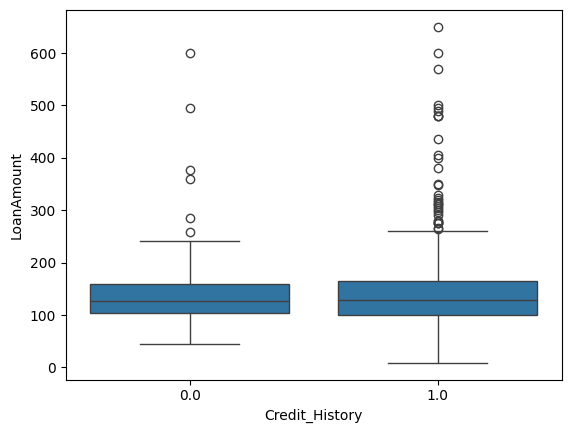

In [154]:
# Plot for Loan Amount by Credit History
sns.boxplot(x=df['Credit_History'], y=df['LoanAmount'])

# Applicants with a positive credit history (1) generally receive higher loan amounts.

In [155]:
print(df_amount.count())

ApplicantIncome            411
CoapplicantIncome          411
LoanAmount                 411
Loan_Amount_Term           411
Credit_History             411
Gender_Female              411
Gender_Male                411
Married_No                 411
Married_Yes                411
Dependents_0               411
Dependents_1               411
Dependents_2               411
Dependents_3+              411
Education_Graduate         411
Education_Not Graduate     411
Self_Employed_No           411
Self_Employed_Unknown      411
Self_Employed_Yes          411
Property_Area_Rural        411
Property_Area_Semiurban    411
Property_Area_Urban        411
dtype: int64


In [156]:
# Split the data in features and target
X = df_amount.drop(columns=["LoanAmount"])  
y = df_amount["LoanAmount"] 


In [157]:
# Scale numerical columns
scaler = StandardScaler()
X[["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]] = scaler.fit_transform(
    X[["ApplicantIncome", "CoapplicantIncome", "Loan_Amount_Term", "Credit_History"]]
)

In [158]:
# Split data for training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# Train train the RandomForest Regressor model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [160]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [161]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Absolute Error: {mae}") #MAE low is better
print(f"Mean Squared Error: {mse}") #MSE Low better
print(f"R² Score: {r2}") #R2 score close to 1 is better

Mean Absolute Error: 31.52162650602409
Mean Squared Error: 2250.386759939759
R² Score: 0.31544597026145393


In [162]:
# Testing with few example cases
test_samples = X_test.iloc[:5]
predictions = rf_model.predict(test_samples)
actual_values = y_test.iloc[:5].values
print("Sample Predictions for Random Forest Model:")
for i in range(len(predictions)):
    print(f"Actual: {actual_values[i]}, Predicted: {predictions[i]}")


Sample Predictions for Random Forest Model:
Actual: 151.0, Predicted: 142.55
Actual: 120.0, Predicted: 113.49
Actual: 94.0, Predicted: 84.505
Actual: 107.0, Predicted: 106.4
Actual: 128.0, Predicted: 122.79


In [163]:
# Let's try a combination of models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
}



In [164]:
# Train and implement models

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}\n")


Linear Regression:
Mean Absolute Error: 33.77344669880712
Mean Squared Error: 2308.3237635156265
R² Score: 0.29782188449323777

Ridge Regression:
Mean Absolute Error: 33.78173613199587
Mean Squared Error: 2306.1238975162473
R² Score: 0.29849107041343936

Lasso Regression:
Mean Absolute Error: 33.72064056082102
Mean Squared Error: 2299.265754371049
R² Score: 0.30057727604268647

Random Forest Regressor:
Mean Absolute Error: 31.57684448906738
Mean Squared Error: 2187.584070141674
R² Score: 0.3345501683242127

Gradient Boosting Regressor:
Mean Absolute Error: 38.3377761073991
Mean Squared Error: 3442.9506857507645
R² Score: -0.04732475682751902



In [165]:
# Testing with few example cases
test_samples = X_test[:5]
actual_values = y_test[:5].values

for name, model in models.items():
    predictions = model.predict(test_samples)
    print("Sample predictions from " f"{name} Predictions:")
    for i in range(len(predictions)):
        print(f"Actual: {actual_values[i]}, Predicted: {predictions[i]}")
    print("")


Sample predictions from Linear Regression Predictions:
Actual: 151.0, Predicted: 140.53600878596657
Actual: 120.0, Predicted: 96.3379574347648
Actual: 94.0, Predicted: 129.47189770287412
Actual: 107.0, Predicted: 114.72923483811498
Actual: 128.0, Predicted: 139.62072361100314

Sample predictions from Ridge Regression Predictions:
Actual: 151.0, Predicted: 140.4903687312973
Actual: 120.0, Predicted: 96.45381902433391
Actual: 94.0, Predicted: 129.50688019569273
Actual: 107.0, Predicted: 114.82427297152974
Actual: 128.0, Predicted: 139.4625067712012

Sample predictions from Lasso Regression Predictions:
Actual: 151.0, Predicted: 140.29802660149434
Actual: 120.0, Predicted: 97.06181386195875
Actual: 94.0, Predicted: 128.42342861065046
Actual: 107.0, Predicted: 115.47110363343022
Actual: 128.0, Predicted: 138.95311518614676

Sample predictions from Random Forest Regressor Predictions:
Actual: 151.0, Predicted: 144.55333333333334
Actual: 120.0, Predicted: 113.17666666666666
Actual: 94.0, Pre

# Conclusion